# Old code

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import scipy.stats as sst
import statsmodels.api as sm

In [120]:
# Initially, I imported all the values from the excel sheet I made with asset allocation.
# I had 5 securities on the left side of the portfolio, and 10 on the right one.
# In order to be able to compare two sides, I needed to make the # of securities equal on both sides,
# which I didn't realize initially. Hence the manual changes in this and the next cell.
# (It was faster to fix it manually in this notebook.)

tickers = []
start_dates = []

tad = pd.read_csv("midterm.csv", header=None)
for ticker in tad[0]:
    tickers.append(ticker)
    
for date in tad[1]:
    start_dates.append(date)

# GSY had crazy kurtosis (~1250), so I decided to remove it    
tickers.remove("GSY")
start_dates.remove("2008-03-01")

print(tickers)
print(start_dates)

['TIP', 'SHV', 'BIL', 'GC=F', 'EMSH', 'EEM', 'VWOB', 'SPHY', 'BSJO', 'HYG', 'AMC', 'GME', 'GBTC', 'ETHE']
['2004-01-01', '2007-02-02', '2007-01-12', '2001-01-01', '2014-01-01', '2004-01-01', '2014-01-01', '2013-01-01', '2017-01-01', '2008-01-01', '2014-01-01', '2003-01-01', '2015-12-12', '2019-01-12']


In [121]:
# Get Data for each ticker
def getData(ticker, start, data_source="yahoo",):
    ret = pdr.DataReader(ticker, data_source, start, end='2022-01-01')["Adj Close"]
    return ret/ret.shift(1) - 1

# Data for left side of the barbell
# (Again, manual additions to the data points.)
TIP = getData(tickers[0], start_dates[0])
LTPZ = getData('LTPZ', '2010-01-01')
SHV = getData(tickers[1], start_dates[1])
VGSH = getData("VGSH", "2010-01-01")
VCSH = getData("VCSH", "2010-01-01")
SHM = getData("SHM", "2008-01-01")
BSV = getData("BSV", "2008-01-01")
BWZ = getData("BWZ", "2009-03-01")
BIL = getData(tickers[2], start_dates[2])
GOLD = getData(tickers[3], start_dates[3])

# Data for right side of the barbell
EMSH = getData(tickers[4], start_dates[4])
EEM = getData(tickers[5], start_dates[5])
VWOB = getData(tickers[6], start_dates[6])
SPHY = getData(tickers[7], start_dates[7])
BSJO = getData(tickers[8], start_dates[8])
HYG = getData(tickers[9], start_dates[9])
AMC = getData(tickers[10], start_dates[10])
GME = getData(tickers[11], start_dates[11])
GBTC = getData(tickers[12], start_dates[12])
ETHE = getData(tickers[13], start_dates[13])

# Drop N/A values for hypothesis testing later on
# (For some reason, the "for" loop didn't work.)
TIP = TIP.dropna()
LTPZ = LTPZ.dropna()
SHV = SHV.dropna()
VGSH = VGSH.dropna()
VCSH = VCSH.dropna()
SHM = SHM.dropna()
BSV = BSV.dropna()
BWZ = BWZ.dropna()
BIL = BIL.dropna()
GOLD = GOLD.dropna()

EMSH = EMSH.dropna()
EEM = EEM.dropna()
VWOB = VWOB.dropna()
SPHY = SPHY.dropna()
BSJO = BSJO.dropna()
HYG = HYG.dropna()
AMC = AMC.dropna()
GME = GME.dropna()
GBTC = GBTC.dropna()
ETHE = ETHE.dropna()


In [122]:
# Which securities are on which side 
left_side = [TIP, SHV, BIL, LTPZ, VGSH, VCSH, SHM, BSV, BWZ, GOLD] # super safe
right_side = [EMSH, EEM, VWOB, SPHY, BSJO, HYG, AMC, GME, GBTC, ETHE] # super risky

left_side_tickers = ["TIP", "SHV", "BIL", "LTPZ", "VGSH", "VCSH", "SHM", "BSV", "BWZ", "GOLD"]
right_side_tickers = ["EMSH", "EEM", "VWOB", "SPHY", "BSJO", "HYG", "AMC", "GME", "GBTC", "ETHE"]

In [123]:
TIP

Date
2004-01-05   -0.001380
2004-01-06    0.006413
2004-01-07    0.000785
2004-01-08   -0.003820
2004-01-09    0.007572
                ...   
2021-12-27    0.003353
2021-12-28   -0.000622
2021-12-29    0.000855
2021-12-30    0.005206
2021-12-31   -0.001237
Name: Adj Close, Length: 4531, dtype: float64

TIP:  (11.789, 0.199)
SHV:  (42.532, -0.258)
BIL:  (46.187, 0.032)
LTPZ:  (20.083, 0.642)
VGSH:  (4.717, 0.23)
VCSH:  (163.983, -2.384)
SHM:  (89.538, -0.21)
BSV:  (71.87, -1.408)
BWZ:  (6.766, 0.223)
GOLD:  (5.424, -0.177)


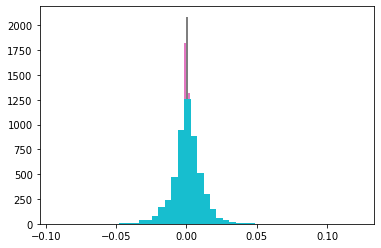

EMSH:  (17.551, -0.029)
EEM:  (17.507, 0.502)
VWOB:  (71.578, -4.23)
SPHY:  (25.767, -0.861)
BSJO:  (48.676, -1.445)
HYG:  (42.611, 0.824)
AMC:  (704.239, 21.065)
GME:  (193.698, 8.062)
GBTC:  (3.611, 0.558)
ETHE:  (320.283, 15.155)


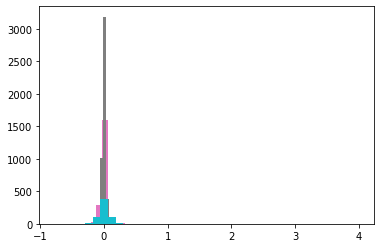

In [124]:
# Plot the kurtosis and skewness of the securities on the left side
for sec, t in zip(left_side_tickers, left_side):
    plt.hist(t, bins=40)
    print(f"{sec}: ", (round(t.kurt(), 3), round(t.skew(), 3)))
plt.show()

# Plot the kurtosis and skewness of the securities on the right side
for sec, t in zip(right_side_tickers, right_side):
    plt.hist(t, bins=40)
    print(f"{sec}: ", (round(t.kurt(), 3), round(t.skew(), 3)))
plt.show()

In [125]:
# Portfolio weights

# Overall portfolio
barbell_weights = np.array([0.9, 0.1])

# Each side
left_side_weights = np.array([0.4, 0.1, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.2])
right_side_weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [126]:
# Mean annual returns, standard deviations, and variances for each left-side security
mean_left = []
std_left = []
var_left = []
skew_left = []
kurt_left = []

for sec in left_side:
    mean_left.append(round(sec.mean() * 100 * 250, 4))
    std_left.append(round(sec.std() * 100 * 250**0.5, 4))
    var_left.append(round(sec.var() * 100 * 250, 4))
    skew_left.append(round(sec.skew(), 4))
    kurt_left.append(round(sec.kurt(), 4))
    
# Mean annual returns, standard deviations, and variances for each right-side security
mean_right = []
std_right = []
var_right = []
skew_right = []
kurt_right = []

for sec in right_side:
    mean_right.append(round(sec.mean() * 100 * 250, 4))
    std_right.append(round(sec.std() * 100 * 250**0.5, 4))
    var_right.append(round(sec.var() * 100 * 250, 4))
    skew_right.append(round(sec.skew(), 4))
    kurt_right.append(round(sec.kurt(), 4))
    
mean_left = np.array(mean_left)
mean_right = np.array(mean_right)
std_left = np.array(std_left)
std_right = np.array(std_right)
var_left = np.array(var_left)
var_right = np.array(var_right)
skew_left = np.array(skew_left)
skew_right = np.array(skew_right)
kurt_left = np.array(kurt_left)
kurt_right = np.array(kurt_right)

print(kurt_left, skew_left)
print(kurt_right, skew_right)

[ 11.7893  42.5319  46.1866  20.0827   4.7173 163.9825  89.5381  71.8696
   6.7662   5.4245] [ 0.1991 -0.2581  0.0318  0.6415  0.2302 -2.3839 -0.2104 -1.4084  0.2227
 -0.1766]
[ 17.5514  17.5072  71.5782  25.7672  48.6761  42.6115 704.2388 193.6982
   3.6113 320.2827] [-0.0292  0.5023 -4.2297 -0.8607 -1.4454  0.8241 21.0653  8.0623  0.5575
 15.1548]


In [127]:
# Mean returns for each side of the portfolio
left_side_return = np.dot(mean_left, left_side_weights)
right_side_return = np.dot(mean_right, right_side_weights)

# Std for each side of the portfolio
left_side_std = np.dot(std_left, left_side_weights)
right_side_std = np.dot(std_right, right_side_weights)

# Variance for each side of the portfolio
left_side_var = np.dot(var_left, left_side_weights)
right_side_var = np.dot(var_right, right_side_weights)

# Skewness for each side of the portfolio
left_side_skew = np.dot(skew_left, left_side_weights)
right_side_skew = np.dot(skew_right, right_side_weights)

# Kurtosis for each side of the portfolio
left_side_kurt = np.dot(kurt_left, left_side_weights)
right_side_kurt = np.dot(kurt_right, right_side_weights)


print((left_side_return, left_side_std, left_side_var, left_side_kurt, left_side_skew))
print("----------")
print((right_side_return, right_side_std, right_side_var, right_side_kurt, right_side_skew))

(4.7742089, 7.3795461, 0.8843521000000001, 27.388959000000003, -0.10517950000000001)
----------
(54.67528000000001, 67.95124000000001, 123.42623, 144.55226000000002, 3.9601300000000004)


In [128]:
# Arrays for computing respective characteristics of the whole portfolio
returns = np.array([left_side_return, right_side_return])
stds = np.array([left_side_std, right_side_std])
var = np.array([left_side_var, right_side_var])
skew = np.array([left_side_skew, right_side_skew])
kurt = np.array([left_side_kurt, right_side_kurt])

# Calculating characteristics of the whole portfolio
portfolio_return = np.dot(returns, barbell_weights)
portfolio_std = np.dot(stds, barbell_weights)
portfolio_var = np.dot(var, barbell_weights)
portfolio_skew = np.dot(skew, barbell_weights)
portfolio_kurt = np.dot(kurt, barbell_weights)

portfolio_return, portfolio_std, portfolio_var, portfolio_skew, portfolio_kurt

(9.764316010000002,
 13.436715490000001,
 13.13853989,
 0.30135145,
 39.10528910000001)

In [129]:
 # [TIP, SHV, BIL, LTPZ, VGSH, VCSH, SHM, BSV, BWZ, GOLD]
dict_left = {
    "TIP": TIP,
    "SHV": SHV,
    "BIL": BIL,
    "LTPZ": LTPZ,
    "VGSH": VGSH,
    "VCSH": VCSH,
    "SHM": SHM,
    "BSV": BSV,
    "BWZ": BWZ,
    "GOLD": GOLD,
}
df_left = pd.DataFrame(dict_left)
df_left = df_left.dropna()


# [EMSH, EEM, VWOB, SPHY, BSJO, HYG, AMC, GME, GBTC, ETHE]
dict_right = {
    "EMSH": EMSH,
    "EEM": EEM,
    "VWOB": VWOB,
    "SPHY": SPHY,
    "BSJO": BSJO,
    "HYG": HYG,
    "AMC": AMC,
    "GME": GME,
    "GBTC": GBTC,
    "ETHE": ETHE,
}
df_right = pd.DataFrame(dict_right)
df_right = df_right.dropna()

dict_portfolio = {
    "TIP": TIP, 
    "SHV": SHV, 
    "BIL": BIL, 
    "LTPZ": LTPZ,
    "VGSH": VGSH,
    "VCSH": VCSH,
    "SHM": SHM,
    "BSV": BSV,
    "BWZ": BWZ, 
    "GOLD": GOLD,
    "EMSH": EMSH,
    "EEM": EEM,
    "VWOB": VWOB,
    "SPHY": SPHY,
    "BSJO": BSJO,
    "HYG": HYG,
    "AMC": AMC,
    "GME": GME,
    "GBTC": GBTC,
    "ETHE": ETHE,
}
df_portfolio = pd.DataFrame(dict_portfolio)
df_portfolio = df_portfolio.dropna()

In [130]:
# Descriptive statistics of the left side of the portfolio
df_left.describe()

,TIP,SHV,BIL,LTPZ,VGSH,VCSH,SHM,BSV,BWZ,GOLD
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,0.000164,0.000020,0.000015,0.000322,0.000046,0.000116,0.000061,0.000076,-0.000029,0.000214
std,0.003389,0.000137,0.000154,0.008487,0.000645,0.001764,0.002050,0.001083,0.004620,0.010247
min,-0.028662,-0.000634,-0.000654,-0.072657,-0.004341,-0.034321,-0.037162,-0.016502,-0.040224,-0.093538
25%,-0.001646,-0.000090,0.000000,-0.004297,-0.000328,-0.000497,-0.000416,-0.000486,-0.002521,-0.004540
50%,0.000250,0.000000,0.000000,0.000517,0.000000,0.000125,0.000000,0.000122,0.000000,0.000358
75%,0.001999,0.000091,0.000109,0.005052,0.000330,0.000751,0.000620,0.000619,0.002522,0.005524
max,0.044536,0.001082,0.000459,0.122741,0.004523,0.035083,0.046220,0.019830,0.046351,0.059477


In [131]:
# I wanted to attract your attention to the starting date: 2010. 
# It will be important later.
df_left.head()

,TIP,SHV,BIL,LTPZ,VGSH,VCSH,SHM,BSV,BWZ,GOLD
Date,,,,,,,,,,
2010-01-05,0.003264,-0.000363,-0.000218,0.005647,0.002009,0.001457,0.002085,0.002511,-0.001362,0.000358
2010-01-06,-0.002583,0.000091,0.000000,-0.001549,-0.000668,0.002908,-0.000833,-0.000751,0.002727,0.015920
2010-01-07,0.001535,0.000000,0.000000,0.003491,0.000167,-0.000659,0.001249,0.000250,-0.014141,-0.002465
2010-01-08,0.002107,0.000363,0.000000,-0.000387,0.000836,0.000791,-0.001664,-0.000250,0.011034,0.004501
2010-01-11,-0.002198,0.000000,0.000000,-0.004254,0.001001,0.000923,0.002500,0.002633,0.006003,0.010982


In [132]:
# Descriptive statistics for the right side of the portfolio
df_right.describe()

,EMSH,EEM,VWOB,SPHY,BSJO,HYG,AMC,GME,GBTC,ETHE
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,0.000035,0.000493,0.000179,0.000289,0.000192,0.000225,0.008057,0.010814,0.003282,0.011650
std,0.002584,0.015679,0.007884,0.006415,0.006421,0.007134,0.150651,0.117674,0.054699,0.187569
min,-0.024697,-0.124792,-0.080392,-0.063697,-0.061781,-0.054966,-0.566332,-0.600000,-0.254355,-0.772414
25%,-0.000763,-0.006609,-0.001924,-0.001129,-0.000825,-0.001453,-0.036495,-0.029771,-0.029142,-0.044377
50%,0.000133,0.001281,0.000767,0.000379,0.000398,0.000344,-0.006075,-0.001953,0.000000,0.000580
75%,0.000962,0.008008,0.002488,0.002024,0.001613,0.002244,0.029995,0.030457,0.036642,0.049632
max,0.019059,0.075139,0.039921,0.054066,0.052421,0.065459,3.012097,1.348358,0.242736,4.000000


In [133]:
df_right.head()
# As you can see, this side's starting period is 2019. This is due to the crypto part being relatively new.
# As a consequence, I'm going to have to use only 675 data points of the left side's dataframe
# for the hypothesis testing part. That is why you'll see something like .mean()[-676: -1]

,EMSH,EEM,VWOB,SPHY,BSJO,HYG,AMC,GME,GBTC,ETHE
Date,,,,,,,,,,
2019-06-17,-0.001451,0.003947,0.000506,-0.002315,0.000039,-0.001507,0.020073,0.012433,0.111111,0.000000
2019-06-18,0.003303,0.024176,0.007973,0.005414,0.002383,0.006964,0.020573,0.005263,-0.045000,0.000000
2019-06-19,0.000658,0.008345,0.006026,0.005769,0.002377,0.004725,0.010517,-0.017452,0.000000,0.000000
2019-06-20,0.003027,0.014661,0.005117,0.002677,0.004743,0.005048,-0.052038,-0.017762,0.110820,4.000000
2019-06-21,-0.001443,-0.003263,-0.005090,-0.000382,-0.000787,-0.003196,-0.030192,-0.019892,0.064415,0.933333


In [134]:
# Portfolio's descriptive statistics
df_portfolio.describe()

,TIP,SHV,BIL,LTPZ,VGSH,VCSH,SHM,BSV,BWZ,GOLD,EMSH,EEM,VWOB,SPHY,BSJO,HYG,AMC,GME,GBTC,ETHE
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,0.000304,0.000028,0.000020,0.000625,0.000058,0.000115,0.000072,0.000083,0.000012,0.000536,0.000035,0.000493,0.000179,0.000289,0.000192,0.000225,0.008057,0.010814,0.003282,0.011650
std,0.004112,0.000144,0.000110,0.011136,0.000681,0.003193,0.003591,0.001534,0.003560,0.010979,0.002584,0.015679,0.007884,0.006415,0.006421,0.007134,0.150651,0.117674,0.054699,0.187569
min,-0.028662,-0.000541,-0.000328,-0.072657,-0.004341,-0.034321,-0.037162,-0.016502,-0.016821,-0.049787,-0.024697,-0.124792,-0.080392,-0.063697,-0.061781,-0.054966,-0.566332,-0.600000,-0.254355,-0.772414
25%,-0.001390,0.000000,0.000000,-0.004326,-0.000164,-0.000364,-0.000403,-0.000367,-0.002077,-0.004041,-0.000763,-0.006609,-0.001924,-0.001129,-0.000825,-0.001453,-0.036495,-0.029771,-0.029142,-0.044377
50%,0.000410,0.000000,0.000000,0.000685,0.000000,0.000122,0.000000,0.000121,0.000000,0.000775,0.000133,0.001281,0.000767,0.000379,0.000398,0.000344,-0.006075,-0.001953,0.000000,0.000580
75%,0.001993,0.000090,0.000109,0.005628,0.000322,0.000675,0.000605,0.000493,0.002062,0.006054,0.000962,0.008008,0.002488,0.002024,0.001613,0.002244,0.029995,0.030457,0.036642,0.049632
max,0.044536,0.001082,0.000437,0.122741,0.004523,0.035083,0.046220,0.019830,0.014262,0.059477,0.019059,0.075139,0.039921,0.054066,0.052421,0.065459,3.012097,1.348358,0.242736,4.000000


In [135]:
df_portfolio.head()
# As you see, the portfolio dataframe will also have only 675 data points.

,TIP,SHV,BIL,LTPZ,VGSH,VCSH,SHM,BSV,BWZ,GOLD,EMSH,EEM,VWOB,SPHY,BSJO,HYG,AMC,GME,GBTC,ETHE
Date,,,,,,,,,,,,,,,,,,,,
2019-06-17,-0.001925,0.000000,0.000000,-0.000147,-0.000493,0.000125,0.000614,-0.000249,0.002617,-0.001045,-0.001451,0.003947,0.000506,-0.002315,0.000039,-0.001507,0.020073,0.012433,0.111111,0.000000
2019-06-18,0.004121,0.000000,0.000000,0.009680,0.000329,0.001371,-0.000614,0.000498,0.000979,0.005901,0.003303,0.024176,0.007973,0.005414,0.002383,0.006964,0.020573,0.005263,-0.045000,0.000000
2019-06-19,0.005763,0.000000,0.000218,0.009587,0.001810,0.002489,0.001024,0.002491,-0.000652,-0.001485,0.000658,0.008345,0.006026,0.005769,0.002377,0.004725,0.010517,-0.017452,0.000000,0.000000
2019-06-20,0.005643,0.000543,0.000109,0.013525,0.000493,0.000993,0.001023,0.000745,0.008806,0.035922,0.003027,0.014661,0.005117,0.002677,0.004743,0.005048,-0.052038,-0.017762,0.110820,4.000000
2019-06-21,-0.004489,-0.000090,0.000000,-0.015048,-0.000492,-0.000620,-0.000613,-0.000869,0.004203,0.002369,-0.001443,-0.003263,-0.005090,-0.000382,-0.000787,-0.003196,-0.030192,-0.019892,0.064415,0.933333


In [136]:
# H_0: MU_left = 0
# H_a: MU_left != 0    

sst.ttest_1samp(a=df_left.mean(axis=1), popmean=0)

# Conclusion for the left side:
#     since p-value is lower than 0.05, there is enough evidence to reject the null hypothesis

Ttest_1sampResult(statistic=2.569371995628682, pvalue=0.010235952237808701)

In [137]:
# H_0: MU_right = 0
# H_a: MU_right != 0

sst.ttest_1samp(a=df_right.mean(axis=1), popmean=0)

# Conclusion for the right side:
#     since p-value is lower than 0.05, there is enough evidence to reject the null hypothesis

Ttest_1sampResult(statistic=2.69367046059972, pvalue=0.007251657976208027)

In [138]:
# H_0: MU_left - MU_right = 0
# H_a: MU_left - MU_right != 0
# Assume 95% significance

s2_p = (3017 / left_side_var + 643 / right_side_var) / (3017 + 643 - 2)
tstat = (left_side_return - right_side_return) / (s2_p / 3017 + s2_p / 643)**0.5
df = 3017 + 643 - 2
cutoff = (-1.96, 1.96)

print((tstat, cutoff))

# Conclusion: since our t-stat is is on the left of the left cut-off value, 
#             there is enough evidence to reject the null hypothesis

(-1188.7155004359477, (-1.96, 1.96))


In [139]:
# H_0: annual sigma^2_left = 0.009
# H_a: annual sigma^2_left != 0.009
# Assume 95% significance

chi_squared_stat = 3017 * left_side_var / 0.009
crit_value = sst.chi2.ppf(0.95, df=3017)
p_value = 1-sst.chi2.cdf(x=chi_squared_stat, df=3017)
print((chi_squared_stat, crit_value, p_value))

# Conclusion: Since our statistic lies on the right of the critical value, 
#             there is enough evidence to reject the null hypothesis

(296454.47618888895, 3145.8971833355076, 0.0)


In [140]:
# H_0: annual sigma^2_right = 1.198
# H_a: annual sigma^2_right != 1.198
# Assume 95% significance

chi_squared_stat = 643 * right_side_var / 1.198
crit_value = sst.chi2.ppf(0.95, df=643)
p_value = 1-sst.chi2.cdf(x=chi_squared_stat, df=643)
print((chi_squared_stat, crit_value, p_value))

# Conclusion: Since our statistic lies on the right of the critical value, 
#             there is enough evidence to reject the null hypothesis

(66246.29873956594, 703.1007922681617, 0.0)


In [141]:
# H_0: annual sigma^2_right = sigma^2_left
# H_a: annual sigma^2_right != sigma^2_left
# Assume 99% significance

F_stat = max(left_side_var/right_side_var, right_side_var/left_side_var)
crit_value = sst.f.ppf(0.99, dfn=643, dfd=3017)
p_value = 1 - sst.f.cdf(F_stat, dfn=643, dfd=3017)
print((F_stat, crit_value, p_value))

# Conclusion: Since our statistic lies on the right of the critical value, 
#             there is enough evidence to reject the null hypothesis

(139.56684221137712, 1.150268417927776, 1.1102230246251565e-16)


In [142]:
# Whether the two sides' mean daily returns are correlated 

sst.pearsonr(df_left.mean(axis=1)[-644: -1], df_right.mean(axis=1))

# Conclusion: since p-value is higher than 0.05,
#             there is not enough evidence to reject the null hypothesis,
#             though the first statistic indicates no correlation

(0.05439097480752393, 0.1683415374630534)

# New code

In [143]:
df_left_mean = df_left.mean(axis=1)
df_right_mean = df_right.mean(axis=1)
df_portfolio_mean = df_portfolio.mean(axis=1)

SPY = getData("^GSPC", "2000-01-01")
SPY = SPY.dropna()

In [144]:
# Calculating left side individual stock's beta and intercept
left_beta = pd.DataFrame(np.nan, index=dict_left.keys(), columns=['beta', 'intercept'])
for t in dict_left.keys():
    slope, intercept, r_value, p_value, stand_err = sst.linregress(SPY[-3018:-1], df_left[t])
    left_beta.loc[t, "beta"] = slope
    left_beta.loc[t, "intercept"] = intercept
left_beta

,beta,intercept
TIP,0.005288,0.000161
SHV,0.000664,0.000020
BIL,0.000193,0.000015
LTPZ,0.014706,0.000315
VGSH,0.002921,0.000044
VCSH,-0.003790,0.000118
SHM,0.011186,0.000055
BSV,0.002618,0.000075
BWZ,0.031208,-0.000045
GOLD,-0.005142,0.000217


In [145]:
# Calculating right side individual stock's beta and intercept
right_beta = pd.DataFrame(np.nan, index=dict_right.keys(), columns=['beta', 'intercept'])
for t in dict_right.keys():
    slope, intercept, r_value, p_value, stand_err = sst.linregress(SPY[-644:-1], df_right[t])
    right_beta.loc[t, "beta"] = slope
    right_beta.loc[t, "intercept"] = intercept
right_beta

,beta,intercept
EMSH,0.038466,6.940044e-07
EEM,-0.307605,7.677202e-04
VWOB,-0.060362,2.328074e-04
SPHY,-0.050233,3.338234e-04
BSJO,-0.033589,2.219482e-04
HYG,-0.069050,2.864583e-04
AMC,-0.168981,8.208237e-03
GME,0.070533,1.075110e-02
GBTC,-0.276120,3.528564e-03
ETHE,-0.357526,1.196926e-02


In [147]:
# Left side vs market regression
regression_left_df = pd.merge(df_left_mean.rename("Left_mean"), SPY.rename('SPY'), left_index=True, right_index=True)
X1 = sm.add_constant(regression_left_df["SPY"])
reg = sm.OLS(regression_left_df["Left_mean"], X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Left_mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.37
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           0.000260
Time:                        21:06:44   Log-Likelihood:                 14252.
No. Observations:                3017   AIC:                        -2.850e+04
Df Residuals:                    3015   BIC:                        -2.849e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.92e-05      2.753      0.006     3.1e-05       0.000
SPY           -0.0132      0.004     -3.657      0.000      -0.020      -0.006
==============================================================================
Omnibus:                      627.370   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18800.623
Skew:                           0.247   Prob(JB):                         0.00
Kurtosis:                      15.219   Cond. No.                         92.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# Gold vs market regression
reg_gold_df = pd.merge(GOLD.rename('Gold'), SPY.rename("SPY"), left_index=True, right_index=True)
X1 = sm.add_constant(reg_gold_df["SPY"])
reg = sm.OLS(reg_gold_df["Gold"], X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Gold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5305
Date:                Sun, 13 Mar 2022   Prob (F-statistic):              0.466
Time:                        21:06:44   Log-Likelihood:                 16228.
No. Observations:                5265   AIC:                        -3.245e+04
Df Residuals:                    5263   BIC:                        -3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.716      0.007       0.000       0.001
SPY           -0.0091      0.012     -0.728      0.466      -0.033       0.015
==============================================================================
Omnibus:                      651.438   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6153.269
Skew:                          -0.223   Prob(JB):                         0.00
Kurtosis:                       8.277   Cond. No.                         81.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# Left side vs right side regression
reg_left_right_df = pd.merge(df_left_mean.rename("Left"), df_right_mean.rename("Right"), left_index=True, right_index=True)
X1 = sm.add_constant(reg_left_right_df['Right'])
reg = sm.OLS(reg_left_right_df["Left"], X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Left   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.457
Date:                Sun, 13 Mar 2022   Prob (F-statistic):              0.118
Time:                        21:06:44   Log-Likelihood:                 2890.3
No. Observations:                 643   AIC:                            -5777.
Df Residuals:                     641   BIC:                            -5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.561      0.119   -4.32e-05       0.000
Right          0.0050      0.003      1.567      0.118      -0.001       0.011
==============================================================================
Omnibus:                      275.685   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11453.749
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                      23.542   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# Portfolio vs market regression
reg_port = pd.merge(df_portfolio_mean.rename("Portfolio"), SPY.rename('SPY'), left_index=True, right_index=True)
X1 = sm.add_constant(reg_port["SPY"])
reg = sm.OLS(reg_port["Portfolio"], X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Portfolio   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     63.64
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           6.90e-15
Time:                        21:06:44   Log-Likelihood:                 1749.4
No. Observations:                 643   AIC:                            -3495.
Df Residuals:                     641   BIC:                            -3486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.001      2.465      0.014       0.000       0.003
SPY            0.3357      0.042      7.977      0.000       0.253       0.418
==============================================================================
Omnibus:                      914.581   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249324.165
Skew:                           7.540   Prob(JB):                         0.00
Kurtosis:                      98.282   Cond. No.                         66.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
# Monte Carlo simulations for left side, right side, and the overall portfolio
monte_carlo_left = np.random.normal(left_side_return, left_side_std, 10000)
monte_carlo_right = np.random.normal(right_side_return, right_side_std, 10000)
monte_carlo_port = np.random.normal(portfolio_return, portfolio_std, 10000)

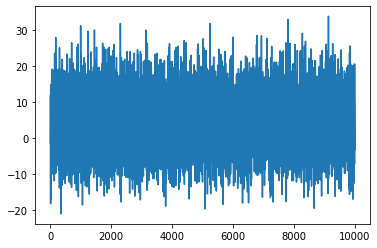

In [152]:
plt.plot(monte_carlo_left)
plt.show()

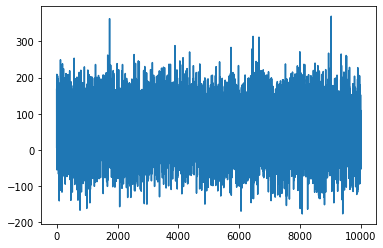

In [153]:
plt.plot(monte_carlo_right)
plt.show()

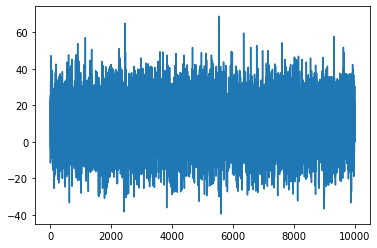

In [154]:
plt.plot(monte_carlo_port)
plt.show()

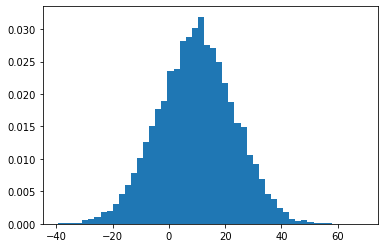

In [155]:
plt.hist(monte_carlo_port, bins=50, density=True)
plt.show()

### Conclusion:

#### Small sample size seriously affected the results of both regression analysis and Monte Carlo simulation. 
Barbell portfolio is designed to be antifragile to any kind of event - especially market crushes - and it is unfortunate that my security selection limits the possibility of testing the portfolio under such extreme conditions. 

#### Regression analysis has shown that our economic intuitions are mostly right: 
* the safe side’s returns are slightly negatively affected with the market returns, 
* while for the overall portfolio, having a bigger market coefficient, the market explains only 9% of the variation of returns.
* it’s good because the portfolio shouldn’t be affected by market returns much. 

#### Monte Carlo simulation, on the other hand, in spite of the fact that its usage in this case is conceptually flawed, still showed that
* our economic intuition is right 
* and that the overall portfolio has a bigger impact from the risky side as well as a positive skewness - in other words, exposition to the extreme upside - which is one of its two important features.

#### Overall
* Barbell portfolio is antifragile
* It allows to not commit a mistake of applying the tools of normal distribution (the only ones we really have) to thick-tailed distributions.